In [3]:
import pandas as pd

df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [4]:
df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [6]:
x = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]

In [19]:
Y = df['body_shape']

#

In [8]:
from sklearn.preprocessing import StandardScaler

In [10]:
x_std = StandardScaler().fit_transform(x)
print(x_std.mean()) # 평균
print(x_std.std()) # 표준편차

3.552713678800501e-17
1.0


In [11]:
features = x_std.T
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [12]:
x_std.T.dot(x_std)/9.0

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

In [13]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('eng val:', eig_vals)
print('eng_vec:', eig_vecs)

eng val: [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]
eng_vec: [[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


- PCA

In [14]:
eig_vals[0]/sum(eig_vals)

0.7318321731427543

In [16]:
projected_x = x_std.dot(eig_vecs.T[0])
projected_x

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [20]:
result = pd.DataFrame(projected_x, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y
result

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


/Users/hosung/opt/anaconda3/envs/nlp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA result')

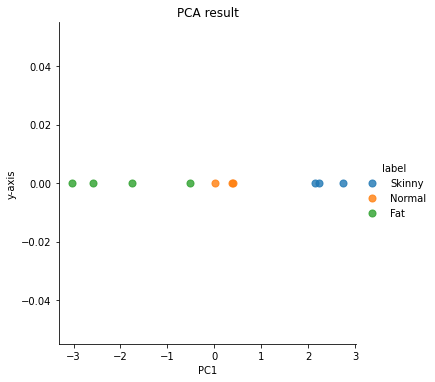

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False, 
           scatter_kws={'s':50},
           hue="label")
plt.title('PCA result')

### sklearn을 이용한 PCA(1차원으로 변환)

In [23]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)
sklearn_pca_x

array([[-2.22600943],
       [-0.0181432 ],
       [ 1.76296611],
       [-2.73542407],
       [ 3.02711544],
       [-2.14702579],
       [-0.37142473],
       [ 2.59239883],
       [-0.39347815],
       [ 0.50902498]])

/Users/hosung/opt/anaconda3/envs/nlp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA result')

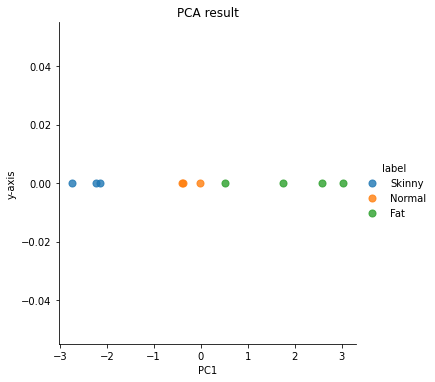

In [24]:
pca_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
pca_result['y-axis'] = 0.0
pca_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=pca_result, fit_reg=False, 
           scatter_kws={'s':50},
           hue="label")
plt.title('PCA result')

### sklearn을 이용한 PCA(2차원으로 변환)

In [25]:
pca = decomposition.PCA(n_components=2)
sklearn_pca_x = pca.fit_transform(x_std)
sklearn_pca_x

array([[-2.22600943, -0.54936514],
       [-0.0181432 , -0.23871898],
       [ 1.76296611,  0.36868681],
       [-2.73542407,  0.4544983 ],
       [ 3.02711544, -0.41305057],
       [-2.14702579, -0.83449111],
       [-0.37142473, -1.05380594],
       [ 2.59239883, -0.3985085 ],
       [-0.39347815,  2.09420397],
       [ 0.50902498,  0.57055116]])

/Users/hosung/opt/anaconda3/envs/nlp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA_result')

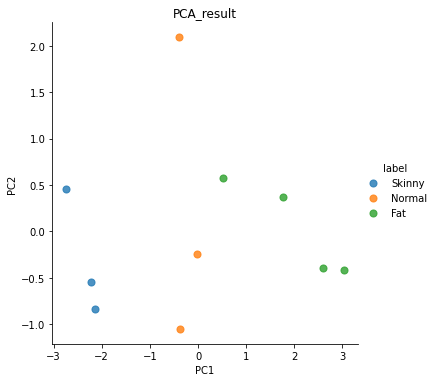

In [26]:
pca_result = pd.DataFrame(sklearn_pca_x, columns=['PC1','PC2'])
pca_result['label'] = Y

sns.lmplot('PC1', 'PC2', data=pca_result, fit_reg=False,
          scatter_kws={'s':50},
           hue="label")
plt.title('PCA_result')